

#Netflix Data Analysis#

## Python · Netflix Data: Cleaning, Analysis and Visualization

### Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [23]:
data = pd.read_csv("/content/netflix1.csv")

In [24]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [25]:
data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


### Checking Data and missing values

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [27]:
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [28]:
data.duplicated().sum()

0

## data cleaning

In [29]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [31]:
data.rename(columns={"date_added":"date","listed_in":"category"},inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date          8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   category      8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


### We proceed to change the type "date" to "datetime"

In [33]:
data["date"]=pd.to_datetime(data["date"])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date          8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


## Analysis Visualization

### what is the ratio between "Movie" and "TV Show"?

In [35]:
rates = data["type"].value_counts().reset_index()
rates

,type,count
0,Movie,6126
1,TV Show,2664


#### We make a graph that represents these values, in this case a pie graph is best. Remember to import the relevant library, in this case "matplotlib.pyplot"

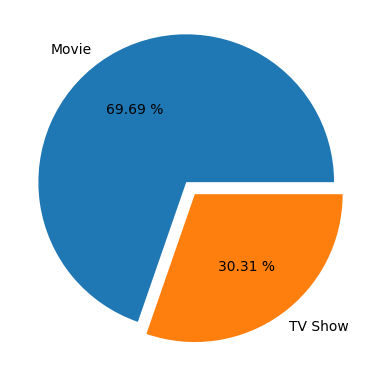

In [36]:
plt.pie(rates["count"], labels=["Movie","TV Show"],autopct="%0.2f %%", explode=(0.1,0))
plt.show()

#### We can see if more films have been released over the years

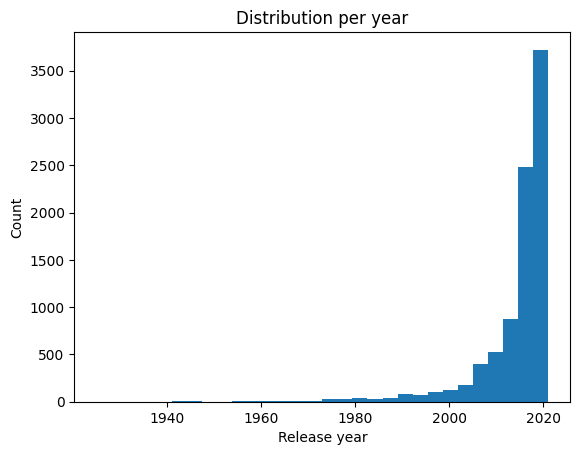

In [37]:
data["release_year"].plot(kind="hist", bins=30)
plt.title("Distribution per year")
plt.xlabel("Release year")
plt.ylabel("Count")
plt.show()

#### now we are going to work with the "duration" parameter

In [38]:
durations = data.groupby(["duration","type"])["duration"].value_counts().reset_index()
durations

,duration,type,count
0,1 Season,TV Show,1791
1,10 Seasons,TV Show,6
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


#### let's classify the movies

In [39]:
movie_duration = durations[durations["type"]=="Movie"]
movie_duration

,duration,type,count
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
5,102 min,Movie,122
6,103 min,Movie,114
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


In [40]:
movie_duration_sorted = movie_duration.sort_values(by = "count", ascending = False)
movie_duration_sorted

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
...,...,...,...
132,253 min,Movie,1
135,273 min,Movie,1
139,3 min,Movie,1
142,312 min,Movie,1


In [41]:
top_5_movie_duration = movie_duration_sorted.head(5)
top_5_movie_duration

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144


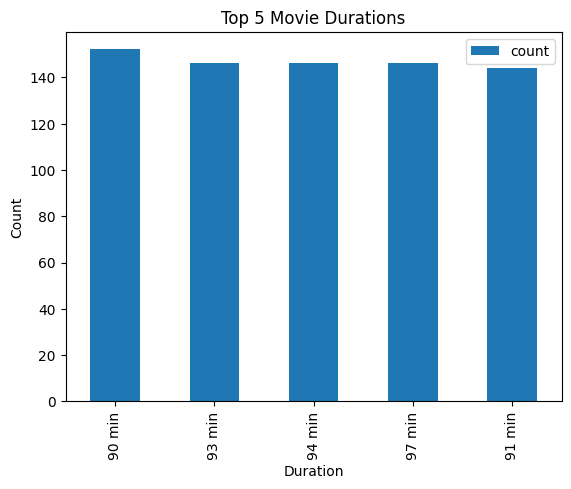

In [42]:
top_5_movie_duration.plot(x="duration",y="count",kind="bar")
plt.title("Top 5 Movie Durations")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

#### What are the most repeated "categories"?

In [43]:
category = data.groupby(["category","type"])["category"].value_counts().reset_index()
category

,category,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


#### We can classify by Movies or TV Shows, let's start with Movies

In [44]:
category_movie = category[category["type"] == "Movie"]
category_movie

,category,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
465,Sci-Fi & Fantasy,Movie,1
466,"Sci-Fi & Fantasy, Thrillers",Movie,12
468,Sports Movies,Movie,1
469,Stand-Up Comedy,Movie,334


In [45]:
category_movie_sorted = category_movie.sort_values(by = "count", ascending = False)
category_movie_sorted

,category,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
...,...,...,...
167,"Classic Movies, Comedies, Romantic Movies",Movie,1
278,"Documentaries, Faith & Spirituality, Music & M...",Movie,1
168,"Classic Movies, Comedies, Sports Movies",Movie,1
274,"Documentaries, Dramas",Movie,1


In [46]:
top_5_category_movie = category_movie_sorted.head(5)
top_5_category_movie

,category,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252


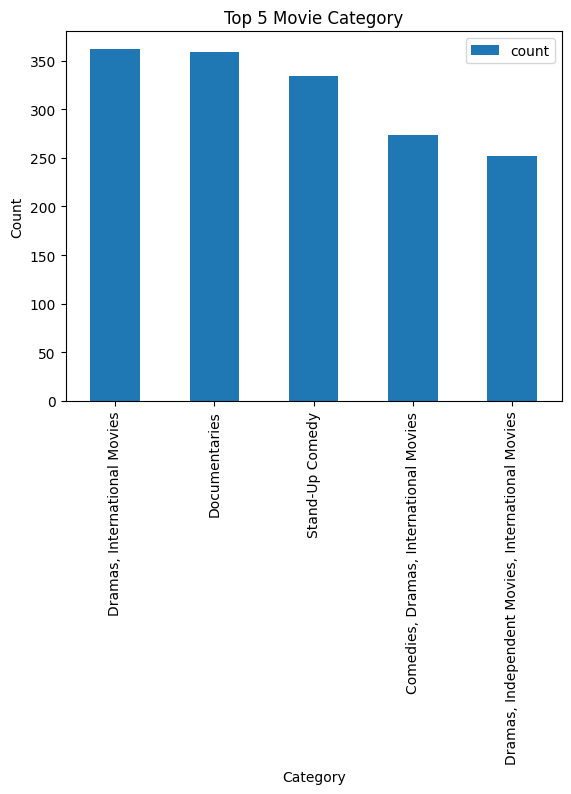

In [47]:
top_5_category_movie.plot(x="category",y="count",kind="bar")
plt.title("Top 5 Movie Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

#### We can see that the category "Drama" is repeated, let's solve this problem by making a breakdown for each word in the "Category" list

In [48]:
Categorys = category_movie["category"].str.split(", ", expand = True)
Categorys

,0,1,2
0,Action & Adventure,None,None
1,Action & Adventure,Anime Features,None
2,Action & Adventure,Anime Features,Children & Family Movies
3,Action & Adventure,Anime Features,Classic Movies
4,Action & Adventure,Anime Features,Horror Movies
...,...,...,...
465,Sci-Fi & Fantasy,None,None
466,Sci-Fi & Fantasy,Thrillers,None
468,Sports Movies,None,None
469,Stand-Up Comedy,None,None


#### We want to show in an easier way how many "Categorys" there are in total

In [49]:
Categorys_count = Categorys.stack().value_counts()
Categorys_count

,count
Dramas,79
Comedies,79
International Movies,70
Action & Adventure,65
Independent Movies,40
Children & Family Movies,40
Sci-Fi & Fantasy,39
Horror Movies,36
Music & Musicals,36
Romantic Movies,36


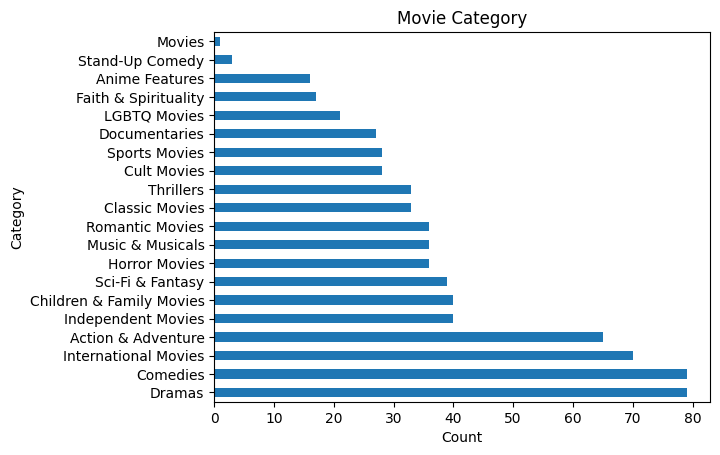

In [50]:
Categorys_count.plot(x="category",y="count",kind="barh")
plt.title("Movie Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

#### Let's continue with the movies but this time a study by countrycountry

In [51]:
country = data.groupby(["country","type"])["country"].value_counts().reset_index()
country

,country,type,count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


In [52]:
country_movie = country[country["type"] == "Movie"]
country_movie

,country,type,count
0,Argentina,Movie,56
2,Australia,Movie,61
4,Austria,Movie,8
6,Bangladesh,Movie,3
8,Belgium,Movie,9
...,...,...,...
132,Uruguay,Movie,8
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


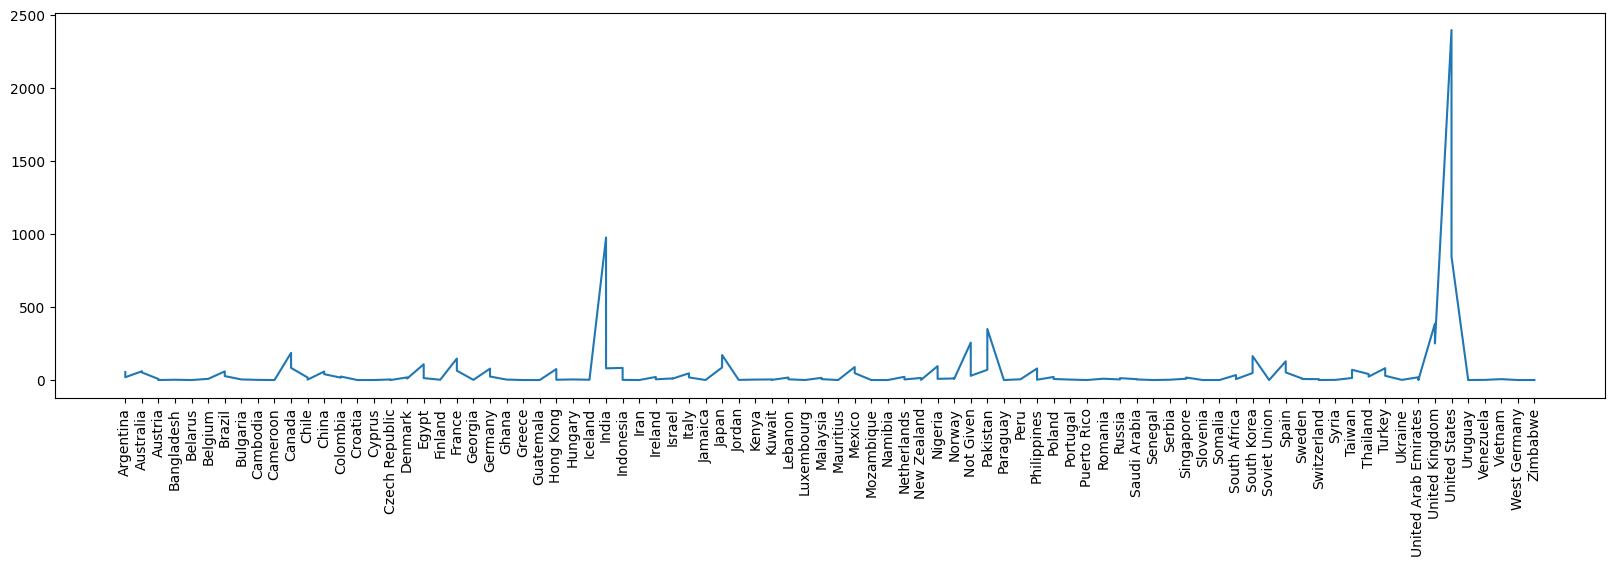

In [53]:
plt.figure(figsize=(20,5))
plt.plot(country['country'],country['count'])
plt.xticks(rotation=90)
plt.show()